###### curve fitting done on AWS linux machine ( pyjags and pymc not available on windows)..so get parameters of all fitted curves parameters (ic50, m)  stored in csv format from Aanchal_AWS/output_files folder

### Script to
1. Plot fitted curves on union of 2 datasets (using updated fitted curves with 5 dosage drugs and replicates summarized in gdcs1)
2. Exract features from the curves for classifying them using area and clustering in next script (th on Area, no more used)

In [1]:
__author__ = 'Aanchal'

In [2]:
shrinkage=''
#shrinkage='shrinkage_'

In [3]:
import pandas as pd
import FUNCTIONS as f
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [4]:
#old data without 5 dosage drugs
'''datasets_list=['CCLE','GDSC']
rawFileDir="../data/"

sample_col_name='Standard cell line name'
drug_col_name ='Standard drug name'
dosage_col_name='Doses (uM)' 
response_col_name='Response'   '''


datasets_list=['CCLE','GDSC1replicatesSummarized']
rawFileDir="../data/data_2019_12_05/"

sample_col_name='cell line name'
drug_col_name ='drug name'
dosage_col_name='Dosage (uM)' 
response_col_name='Response' 

#directory containing m,ic50 of all fitte curves per pair (1 file per CL)
FittedCurves_dir='../../Aanchal_AWS/output_files/FittedCurves_commonPairs_replicatesSummarized/'#without5dosageDrugs'#

out_dir='../figures/FittedCurves_commonPairs_plots/'


In [5]:
[Intersection,  Intersection_names] = f.getCommonPairs(datasets_list, rawFileDir, sample_col_name, drug_col_name, dosage_col_name, response_col_name)

0
1


In [6]:
# FOR ALL COMMON PAIRS
indices=len(Intersection)
df=Intersection_names

In [7]:
# FOR 1 SPECIFIC PAIR
'''indices1=Intersection_names.index[Intersection_names['Standard cell line name']=='JVM-3']
indices2=Intersection_names.index[Intersection_names['Standard drug name']=='Paclitaxel']
#697,Paclitaxel

indices=Intersection_names.index[ indices1 & indices2]
df=Intersection_names.loc[indices]'''

"indices1=Intersection_names.index[Intersection_names['Standard cell line name']=='JVM-3']\nindices2=Intersection_names.index[Intersection_names['Standard drug name']=='Paclitaxel']\n#697,Paclitaxel\n\nindices=Intersection_names.index[ indices1 & indices2]\ndf=Intersection_names.loc[indices]"

In [8]:
# FOR 1 SPECIFIC DRUG/CL
'''drname='Selumetinib'
indices=Intersection_names.index[Intersection_names['Standard drug name']==drname1]
df=Intersection_names[Intersection_names['Standard drug name']==drname1]'''

#clname1='JVM-3'OCUM-1
'''clname1='TE-11'#'TE-11'
indices=Intersection_names.index[Intersection_names['Standard cell line name']==clname1]
df=Intersection_names[Intersection_names['Standard cell line name']==clname1]'''

"clname1='TE-11'#'TE-11'\nindices=Intersection_names.index[Intersection_names['Standard cell line name']==clname1]\ndf=Intersection_names[Intersection_names['Standard cell line name']==clname1]"

#### Generating HDI features

0 22RV1
Nilotinib
[-8.64385619 -5.73289214 -2.82192809  0.08903595  3.        ] [2.81140614e-37 1.25846301e-33 4.94880782e-30 1.31736150e-27
 3.50678663e-25] [-8.64385619 -5.73289214 -2.82192809  0.08903595  3.        ] [0.00242556 0.00564994 0.01399005 0.03916075 0.16575796]


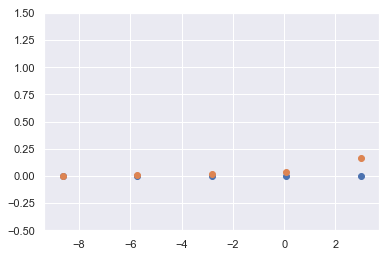

0.4159549265056539 

0.4159549265056539 0.48607046388268127 11.325927195338544 [0.16756513603400416] [11.643856189774725]
Selumetinib
[-8.64385619 -5.73289214 -2.82192809  0.08903595  3.        ] [0.02409268 0.06436739 0.12309853 0.19771081 0.24908073] [-8.64385619 -5.73289214 -2.82192809  0.08903595  3.        ] [0.21794567 0.26094113 0.30645126 0.383975   0.51561173]


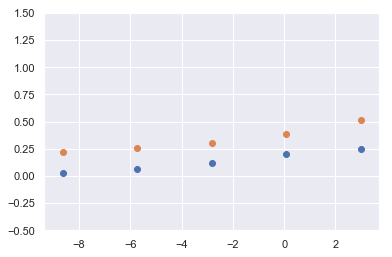

2.3182412641887793 

2.3182412641887793 0.14343443302597553 5.827723717047089 [0.16756513603400416, 0.13912203888720717] [11.643856189774725, 11.643856189774725]
Nutlin-3a
[-8.64385619 -5.73289214 -2.82192809  0.08903595  3.        ] [3.21934926e-11 1.23624159e-08 4.74718932e-06 1.72534797e-02
 2.29327079e-01] [-8.64385619 -5.73289214 -2.82192809  0.08903595  3.        ] [0.0104271  0.02604647 0.06436643 0.16545328 0.50496101]


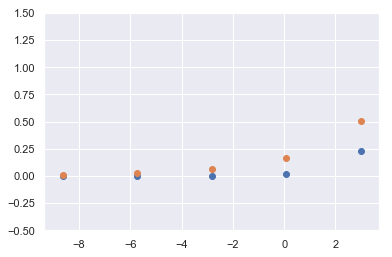

1.1109358637176838 

1.1109358637176838 0.8513770493776041 3.535129082475394 [0.16756513603400416, 0.13912203888720717, 0.07553870010025472] [11.643856189774725, 11.643856189774725, 11.643856189774725]
Palbociclib
[-8.64385619 -5.73289214 -2.82192809  0.08903595  3.        ] [2.34273527e-07 1.12800489e-05 4.92529130e-02 1.59529354e-01
 2.62913209e-01] [-8.64385619 -5.73289214 -2.82192809  0.08903595  3.        ] [0.12924237 0.1800075  0.27758483 0.43212082 0.70621584]


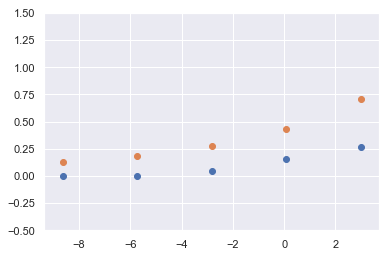

2.8154611066977266 

2.8154611066977266 0.3542795991741276 2.5435255036303035 [0.16756513603400416, 0.13912203888720717, 0.07553870010025472, 0.1537886223079863] [11.643856189774725, 11.643856189774725, 11.643856189774725, 11.643856189774725]
PD0325901
[-10.    -6.75  -3.5   -0.25   3.  ] [0.0323002  0.07796082 0.16363138 0.24162264 0.30532344] [-10.    -6.75  -3.5   -0.25   3.  ] [0.20806128 0.25749812 0.33518135 0.46383429 0.65332819]


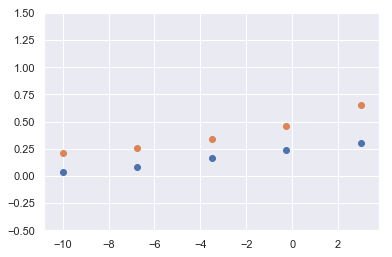

2.714340959295175 

2.714340959295175 0.20273653299794675 2.5736741957144336 [0.16756513603400416, 0.13912203888720717, 0.07553870010025472, 0.1537886223079863, 0.11354369361439673] [11.643856189774725, 11.643856189774725, 11.643856189774725, 11.643856189774725, 13.0]
Tanespimycin
[-8.64385619 -5.73289214 -2.82192809  0.08903595  3.        ] [3.54598703e-08 1.24779416e-05 3.06711653e-02 3.40645624e-01
 6.80286973e-01] [-8.64385619 -5.73289214 -2.82192809  0.08903595  3.        ] [0.03400223 0.09457457 0.26329619 0.67884207 0.99476426]


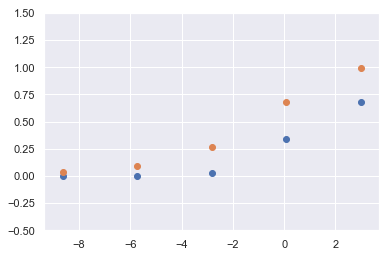

2.4441132702002104 

2.4441132702002104 0.8256265241962883 0.09159735753934012 [0.16756513603400416, 0.13912203888720717, 0.07553870010025472, 0.1537886223079863, 0.11354369361439673, 0.11444803682207128] [11.643856189774725, 11.643856189774725, 11.643856189774725, 11.643856189774725, 13.0, 11.643856189774725]
PLX-4720
[-8.64385619 -5.65241012 -2.66096405  0.33048202  3.32192809] [2.86141079e-38 1.66673371e-34 9.70850209e-31 5.65507329e-27
 3.29400494e-23] [-8.64385619 -5.65241012 -2.66096405  0.33048202  3.32192809] [0.01233671 0.02290622 0.04309084 0.08949169 0.25765949]


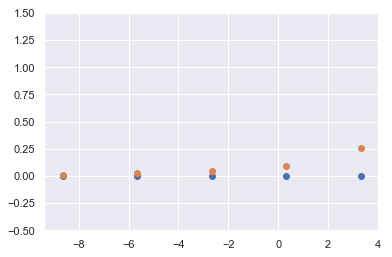

0.8689757350963311 

0.8689757350963311 0.526606474143186 6.669558650513175 [0.16756513603400416, 0.13912203888720717, 0.07553870010025472, 0.1537886223079863, 0.11354369361439673, 0.11444803682207128, 0.11682604492020175] [11.643856189774725, 11.643856189774725, 11.643856189774725, 11.643856189774725, 13.0, 11.643856189774725, 11.965784284662087]
Panobinostat
[-8.64385619 -5.73289214 -2.82192809  0.08903595  3.        ] [0.02740766 0.46854223 0.88984238 0.98378032 0.99772661] [-8.64385619 -5.73289214 -2.82192809  0.08903595  3.        ] [0.16249847 0.72032249 0.99580432 0.99999995 1.        ]


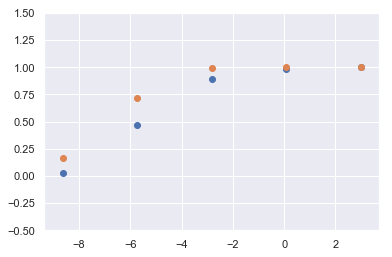

1.288520534519905 

1.288520534519905 1.2479152737158128 -6.131589799878423 [0.16756513603400416, 0.13912203888720717, 0.07553870010025472, 0.1537886223079863, 0.11354369361439673, 0.11444803682207128, 0.11682604492020175, 0.06467582390434912] [11.643856189774725, 11.643856189774725, 11.643856189774725, 11.643856189774725, 13.0, 11.643856189774725, 11.965784284662087, 11.643856189774725]


In [9]:
# dont use iloc, use iterrows .. DONE although no difference in runnig time
#vectorize, dont put loop .. DONE

hdi_a=[]
hdi_ab=[]
hdi_b=[]
hdi_bc=[]
hdi_c=[]
hdi_m=[]
hdi_ic50=[]

clname_l=[]
drname_l=[]

ar_fittedcurves_l=[]
ic50_l=[]
m_l=[]
mae_l=[]


width_l=[]
mindosage_l=[]
maxdosage_l=[]

cl_list = sorted(list(set(df[sample_col_name])))

i=0
for clname in cl_list:
    print(i, clname)
    i=i+1
    
    cl_df = df[df[sample_col_name] == clname]
    fin=os.path.join(FittedCurves_dir, '{:s}.csv'.format(clname +'_'+shrinkage+'fitted'))
    curveParas_df=pd.read_csv(fin)
    
    for ind, row in cl_df.iterrows():
        
        drname= row[drug_col_name]#drname=Intersection_names.loc[i,'Standard drug name']
        
        curveParas_df_drugSpecific=curveParas_df[curveParas_df['drug name']==drname]
        beta0=np.array(  curveParas_df_drugSpecific[['beta0']]  ) #hdi_ic50=getHDI(beta0)
        beta1=np.array( curveParas_df_drugSpecific[['beta1']]       ) #hdi_m=getHDI(beta1) 
        
        [log2_dosage, res_0to1, source_dataset]=f.get_pairInfo(Intersection, clname,drname, sample_col_name, drug_col_name, dosage_col_name, response_col_name)
        label= [ 1+datasets_list.index(l) for l in source_dataset] #1+datasets_list.index[l]
       
        response_func=np.vectorize(f.getResponse)  
        
    
        [interval0, int_st0, int_end0] = f.getHDI( beta0, 0.99 )
        beta0mode = np.mean( [int_st0[0] , int_end0[0] ] ) #or int_st[0]+( int_end[0] -int_st[0] )/2 (mid value of 1%ile HDI)
        
        [interval1, int_st1, int_end1] = f.getHDI( beta1, 0.99 )
        beta1mode = np.mean( [int_st1[0] , int_end1[0] ] )

        
        mae_l.append( mean_absolute_error(res_0to1, response_func(log2_dosage,beta0mode,beta1mode)) )
        ic50_l.append(beta0mode)
        m_l.append(beta1mode)

        [mindosage, ab_dosage, middosage, bc_dosage, maxdosage]= f.get5dosagePoints(log2_dosage)
        
        mindosage_l.append(mindosage)
        maxdosage_l.append(maxdosage)
        width_l.append(maxdosage-mindosage)
    
        xaxis=np.array( [mindosage, ab_dosage,middosage, bc_dosage ,maxdosage] ).transpose()
        [curve1, curve2]=f.get5DiscretePointsAtFittedCurves(mindosage, ab_dosage, middosage, bc_dosage, maxdosage,beta0,beta1)
        
        print(drname)
        print(xaxis , curve1, xaxis, curve2)
        [ar_fittedcurves, dtw ]= f.getCurveSimilarities(xaxis , curve1, xaxis, curve2 )
        plt.figure()
        plt.scatter(xaxis, curve1)
        plt.scatter(xaxis, curve2)
        plt.ylim([-0.5, 1.5])
        plt.show()
        print(ar_fittedcurves,"\n")
        clname_l.append(clname)
        drname_l.append(drname)
        ar_fittedcurves_l.append(ar_fittedcurves)
        
    
        hdi_a.append( f.getHDI( response_func(mindosage,beta0,beta1), 0.05 )[0][0]  )
        hdi_ab.append( f.getHDI( response_func(ab_dosage,beta0,beta1), 0.05 )[0][0]  )
        hdi_b.append(f.getHDI( response_func(middosage,beta0,beta1), 0.05 )[0][0]  )
        hdi_bc.append(f.getHDI( response_func(bc_dosage,beta0,beta1), 0.05 )[0][0]  )
        hdi_c.append(f.getHDI( response_func(maxdosage,beta0,beta1), 0.05 )[0][0]  )
        hdi_m.append(f.getHDI( beta1, 0.05 )[0][0]  )
        hdi_ic50.append(f.getHDI( beta0, 0.05 )[0][0] )
        
        print(  ar_fittedcurves, beta1mode,beta0mode, mae_l, width_l)
        # plot  
        #f.plotFittedCurves(log2_dosage,res_0to1, beta0,beta1,  clname, drname,label, out_dir)
        
    break
        

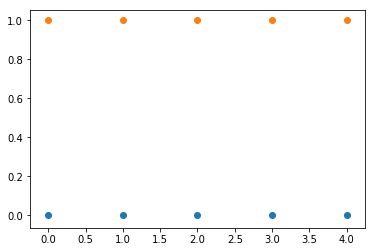

area1 : 0.0


In [4]:

import numpy as np
import matplotlib.pyplot as plt
import similaritymeasures
xaxis=[0,1, 2, 3, 4]
curve1=[0,0,0,0,0]
curve2=[1,1,1,1,1]
exp_data = np.zeros((len(xaxis), 2))
num_data = np.zeros((len(xaxis), 2))

exp_data[:, 0] = xaxis
exp_data[:, 1] = curve1
num_data[:, 0] = xaxis
num_data[:, 1] = curve2

plt.figure()
plt.scatter(xaxis, curve1)
plt.scatter(xaxis, curve2)
plt.show()
        
area1=similaritymeasures.area_between_two_curves(exp_data, num_data)
print("area1 : "+str(area1) )

In [23]:
# Generate random experimental data
import similaritymeasures
np.random.seed(0)
x = np.random.random(5)
y = np.random.random(5)
P = np.array([x, y]).T

# Generate random Q
x = np.random.random(5)
y = np.random.random(5)
Q = np.array([x, y]).T

area = similaritymeasures.area_between_two_curves(P, Q)
print(P)
print(Q)
# all methods will return 0.0 when P and Q are the same
print(area)

[[0.5488135  0.64589411]
 [0.71518937 0.43758721]
 [0.60276338 0.891773  ]
 [0.54488318 0.96366276]
 [0.4236548  0.38344152]]
[[0.79172504 0.0871293 ]
 [0.52889492 0.0202184 ]
 [0.56804456 0.83261985]
 [0.92559664 0.77815675]
 [0.07103606 0.87001215]]
0.1104586493460395


In [44]:
!pip3 install similaritymeasures

In [32]:
feature_df=pd.DataFrame()
feature_df['Standard cell line name']=clname_l
feature_df['Standard drug name']=drname_l
feature_df['HDI_mindosage']=hdi_a
feature_df['HDI_ab_dosage']=hdi_ab
feature_df['HDI_middosage']=hdi_b
feature_df['HDI_bc_dosage']=hdi_bc
feature_df['HDI_maxdosage']=hdi_c
feature_df['HDI_ic50']=hdi_ic50
feature_df['HDI_m']=hdi_m
feature_df['Area_between_fitted_curves_5dosages']=ar_fittedcurves_l
feature_df['m_mode']=m_l
feature_df['ic50_mode']=ic50_l
feature_df['mae_fitness']=mae_l
feature_df.sort_values(['Standard cell line name', 'Standard drug name'])

feature_df['width']=width_l
feature_df['log2(min_dosage_bothDatasets)']=mindosage_l
feature_df['log2(max_dosage_bothDatasets)']=maxdosage_l
feature_df['IS']=feature_df['Area_between_fitted_curves_5dosages']/feature_df['width'] #IS(inconsistency score) or AAA(Adjusted Approximayed area)
#feature_df.to_csv('../data_processed/FittedCurvesCommonPairs_features/Feature_Matrix_FLatPerDrugFitting_15features.csv', index=False)


In [35]:
feature_df=feature_df.sort_values(['Standard cell line name', 'Standard drug name'])
feature_df

,Standard cell line name,Standard drug name,HDI_mindosage,HDI_ab_dosage,HDI_middosage,HDI_bc_dosage,HDI_maxdosage,HDI_ic50,HDI_m,Area_between_fitted_curves_5dosages,m_mode,ic50_mode,mae_fitness,width,log2(min_dosage_bothDatasets),log2(max_dosage_bothDatasets),IS
0,22RV1,Nilotinib,0.002426,0.005650,0.013990,0.039161,0.165758,20.040970,1.890230,0.000000e+00,0.486070,11.325927,0.167565,11.643856,-8.643856,3.000000,0.000000e+00
2,22RV1,Nutlin-3a,0.010427,0.026046,0.064362,0.148200,0.275634,3.320041,1.274590,5.551115e-17,0.851377,3.535129,0.075539,11.643856,-8.643856,3.000000,4.767420e-18
4,22RV1,PD0325901,0.175761,0.179537,0.171550,0.222212,0.348005,12.397516,0.311910,2.220446e-16,0.202737,2.573674,0.113544,13.000000,-10.000000,3.000000,1.708035e-17
6,22RV1,PLX-4720,0.012337,0.022906,0.043091,0.089492,0.257659,17.263353,1.591559,0.000000e+00,0.526606,6.669559,0.116826,11.965784,-8.643856,3.321928,0.000000e+00
3,22RV1,Palbociclib,0.129242,0.179996,0.228332,0.272591,0.443303,9.105279,0.647930,0.000000e+00,0.354280,2.543526,0.153789,11.643856,-8.643856,3.000000,0.000000e+00
7,22RV1,Panobinostat,0.135091,0.251780,0.105962,0.016220,0.002273,0.988890,1.005521,8.881784e-16,1.247915,-6.131590,0.064676,11.643856,-8.643856,3.000000,7.627872e-17
1,22RV1,Selumetinib,0.193853,0.196574,0.183353,0.186264,0.266531,15.413213,0.309432,1.110223e-16,0.143434,5.827724,0.139122,11.643856,-8.643856,3.000000,9.534840e-18
5,22RV1,Tanespimycin,0.034002,0.094562,0.232625,0.338196,0.314477,2.325434,1.147841,3.330669e-16,0.825627,0.091597,0.114448,11.643856,-8.643856,3.000000,2.860452e-17
9,42-MG-BA,Nutlin-3a,0.023178,0.036070,0.057833,0.094532,0.174375,19.709553,1.770027,0.000000e+00,0.337036,9.177279,0.160876,11.643856,-8.643856,3.000000,0.000000e+00
10,42-MG-BA,PD0325901,0.052883,0.090218,0.158159,0.235353,0.434736,7.392944,0.819236,2.220446e-16,0.471325,2.924043,0.092807,13.000000,-10.000000,3.000000,1.708035e-17
